In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

**Training Reward**

In [2]:
config1 = pd.read_csv('config_1.csv')
config2 = pd.read_csv('config_2.csv')
config3 = pd.read_csv('config_3.csv')
config3.head()

,Wall time,Step,Value
0,1.757674e+09,8192,-88.603394
1,1.757674e+09,24576,-87.025925
2,1.757674e+09,32768,-87.872002
3,1.757674e+09,40960,-86.859932
4,1.757674e+09,90112,-86.833794


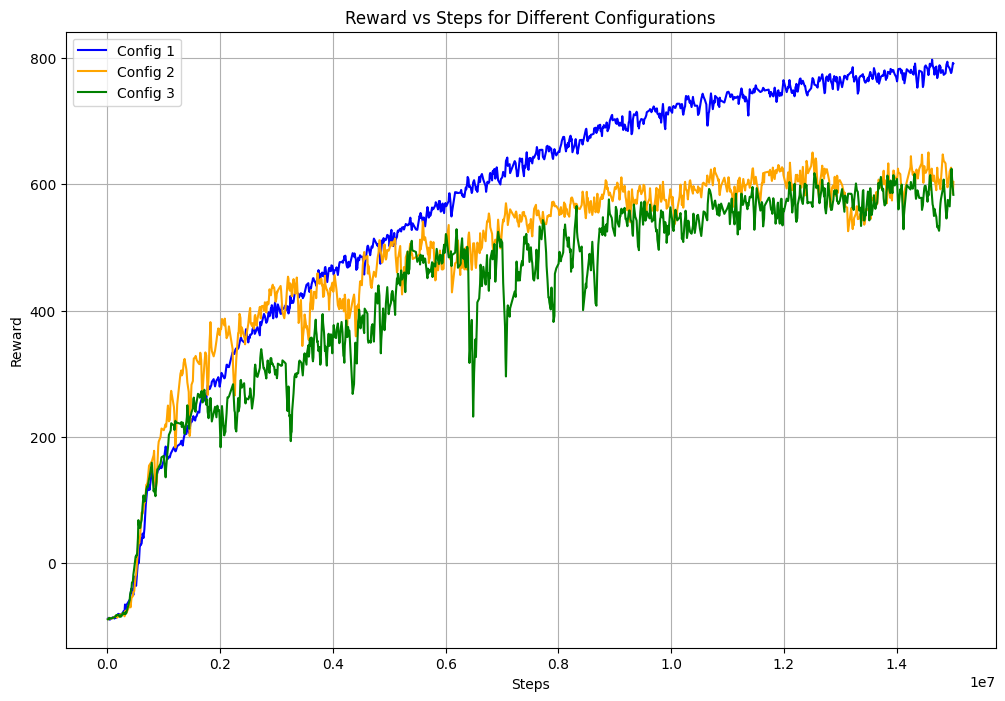

In [3]:
plt.figure(figsize=(12, 8))
plt.plot(config1['Step'], config1['Value'], label='Config 1', color='blue')
plt.plot(config2['Step'], config2['Value'], label='Config 2', color='orange')
plt.plot(config3['Step'], config3['Value'], label='Config 3', color='green')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward vs Steps for Different Configurations')
plt.legend()
plt.grid(True)
plt.savefig('reward_comparison.png')

In [2]:
nn_256_256_nodecay_path = "ppo_newreward/PPO_39"
lstm_64_nn_256_path = "ppo_lstm/RecurrentPPO_1"
lstm64_nn_256_256_path = "ppo_lstm/RecurrentPPO_3"
nn_256_256_decay_path = "ppo_newreward/PPO_42"
nn_256_256_norside_path = "ppo_newreward/PPO_43"

**Analyze Velocity Tracking**

In [6]:
nn_256_256_vel_csv = pd.read_csv(os.path.join(nn_256_256_nodecay_path, "demo_data_vel_diff_mlp_0.csv"))
lstm_64_nn_256_vel_csv = pd.read_csv(os.path.join(lstm_64_nn_256_path, "demo_data_vel_diff_lstm_0.csv"))
lstm64_nn_256_256_vel_csv = pd.read_csv(os.path.join(lstm64_nn_256_256_path, "demo_data_vel_diff_lstm_0.csv"))
nn_256_256_decay_vel_csv = pd.read_csv(os.path.join(nn_256_256_decay_path, "demo_data_vel_diff_mlp_0.csv"))
nn_256_256_norside_vel_csv = pd.read_csv(os.path.join(nn_256_256_norside_path, "demo_data_vel_diff_mlp_0.csv"))
simbicon_vel_csv = pd.read_csv("/home/baran/Bipedal-imitation-rl/locomotion-master(1)/locomotion-master/simbicon_velocity_diff.csv")

In [7]:
mean_speeds_nn_256_256 = nn_256_256_vel_csv["mean speed"]
mean_speeds_lstm_64_nn_256 = lstm_64_nn_256_vel_csv["mean speed"]
mean_speeds_lstm64_nn_256_256 = lstm64_nn_256_256_vel_csv["mean speed"]
mean_speeds_nn_256_256_decay = nn_256_256_decay_vel_csv["mean speed"]
mean_speeds_nn_256_256_norside = nn_256_256_norside_vel_csv["mean speed"]
mean_speeds_simbicon = simbicon_vel_csv["mean speed"]

print(len(mean_speeds_nn_256_256), len(mean_speeds_lstm_64_nn_256), len(mean_speeds_lstm64_nn_256_256), len(mean_speeds_nn_256_256_decay), 
      len(mean_speeds_nn_256_256_norside), len(mean_speeds_simbicon))

mean_speeds_nn_256_256 = mean_speeds_nn_256_256[:-2]
mean_speeds_lstm_64_nn_256 = mean_speeds_lstm_64_nn_256[:-2]
mean_speeds_lstm64_nn_256_256 = mean_speeds_lstm64_nn_256_256[:-2]
mean_speeds_nn_256_256_decay = mean_speeds_nn_256_256_decay[:-2]
mean_speeds_simbicon = mean_speeds_simbicon[:-2]
cmd_speeds = nn_256_256_norside_vel_csv["cmd speed"].unique()

print(len(mean_speeds_nn_256_256), len(mean_speeds_lstm_64_nn_256), len(mean_speeds_lstm64_nn_256_256), len(mean_speeds_nn_256_256_decay), 
      len(mean_speeds_nn_256_256_norside), len(mean_speeds_simbicon))

41 41 41 41 39 41
39 39 39 39 39 39


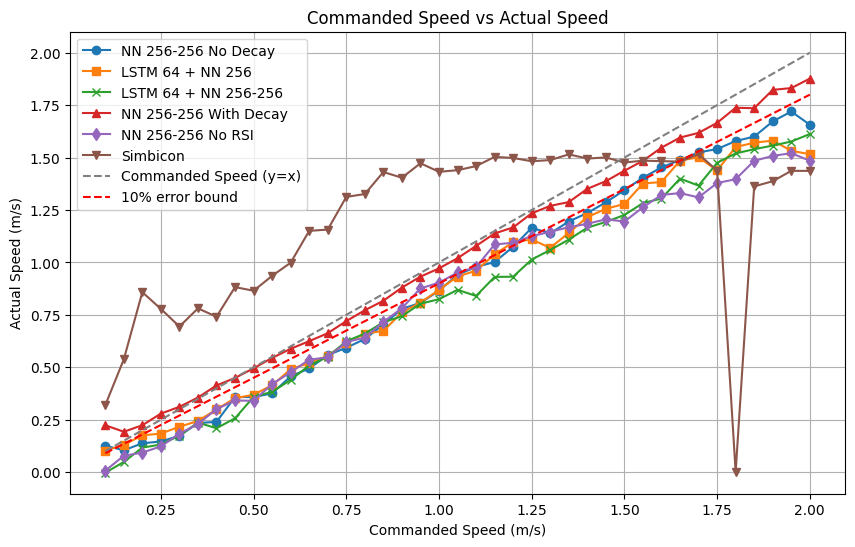

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(cmd_speeds, mean_speeds_nn_256_256, label='NN 256-256 No Decay', marker='o')
plt.plot(cmd_speeds, mean_speeds_lstm_64_nn_256, label='LSTM 64 + NN 256', marker='s')
plt.plot(cmd_speeds, mean_speeds_lstm64_nn_256_256, label='LSTM 64 + NN 256-256', marker='x')
plt.plot(cmd_speeds, mean_speeds_nn_256_256_decay, label='NN 256-256 With Decay', marker='^')
plt.plot(cmd_speeds, mean_speeds_nn_256_256_norside, label='NN 256-256 No RSI', marker='d')
plt.plot(cmd_speeds, mean_speeds_simbicon, label='Simbicon', marker='v')
plt.plot(cmd_speeds, cmd_speeds, '--', color='gray', label='Commanded Speed (y=x)')  # Reference line y=x
plt.plot(cmd_speeds, cmd_speeds * 0.9, '--', color='red', label='10% error bound')  # 90% line
plt.title('Commanded Speed vs Actual Speed')
plt.xlabel('Commanded Speed (m/s)')
plt.ylabel('Actual Speed (m/s)')
plt.legend()
plt.grid()
plt.show()

**Rotation Success Analysis**

In [5]:
nn_256_256_nodecay_rotation_csv = pd.read_csv(os.path.join(nn_256_256_nodecay_path, "demo_data_rotation_mlp_0.csv"))
lstm_64_nn_256_rotation_csv = pd.read_csv(os.path.join(lstm_64_nn_256_path, "demo_data_rotation_lstm_0.csv"))
lstm64_nn_256_256_rotation_csv = pd.read_csv(os.path.join(lstm64_nn_256_256_path, "demo_data_rotation_lstm_0.csv"))
nn_256_256_decay_rotation_csv = pd.read_csv(os.path.join(nn_256_256_decay_path, "demo_data_rotation_mlp_0.csv"))
nn_256_256_norsi_rotation_csv = pd.read_csv(os.path.join(nn_256_256_norside_path, "demo_data_rotation_mlp_0.csv"))
simbicon_rotation_csv = pd.read_csv("/home/baran/Bipedal-imitation-rl/locomotion-master(1)/locomotion-master/simbicon_rotation_data.csv")

In [6]:
ramp_angles = nn_256_256_nodecay_rotation_csv["angle"].unique()
nn_256_256_nodecay_angle_success_rate = np.zeros(len(ramp_angles))
lstm_64_nn_256_angle_success_rate = np.zeros(len(ramp_angles))
lstm64_nn_256_256_angle_success_rate = np.zeros(len(ramp_angles))
nn_256_256_decay_angle_success_rate = np.zeros(len(ramp_angles))
nn_256_256_norsi_angle_success_rate = np.zeros(len(ramp_angles))
simbicon_rotation_success_rate = np.zeros(len(ramp_angles))
for i, angle in enumerate(ramp_angles):
    total_trials = len(nn_256_256_nodecay_rotation_csv[nn_256_256_nodecay_rotation_csv["angle"] == angle])
    nn_256_256_decay_angle_success_rate[i] = len(nn_256_256_decay_rotation_csv[(nn_256_256_decay_rotation_csv["angle"] == angle) & (nn_256_256_decay_rotation_csv["success"] == 1)]) / total_trials
    nn_256_256_nodecay_angle_success_rate[i] = len(nn_256_256_nodecay_rotation_csv[(nn_256_256_nodecay_rotation_csv["angle"] == angle) & (nn_256_256_nodecay_rotation_csv["success"] == 1)]) / total_trials
    lstm_64_nn_256_angle_success_rate[i] = len(lstm_64_nn_256_rotation_csv[(lstm_64_nn_256_rotation_csv["angle"] == angle) & (lstm_64_nn_256_rotation_csv["success"] == 1)]) / total_trials
    lstm64_nn_256_256_angle_success_rate[i] = len(lstm64_nn_256_256_rotation_csv[(lstm64_nn_256_256_rotation_csv["angle"] == angle) & (lstm64_nn_256_256_rotation_csv["success"] == 1)]) / total_trials
    nn_256_256_norsi_angle_success_rate[i] = len(nn_256_256_norsi_rotation_csv[(nn_256_256_norsi_rotation_csv["angle"] == angle) & (nn_256_256_norsi_rotation_csv["success"] == 1)]) / total_trials
    simbicon_rotation_success_rate[i] = len(simbicon_rotation_csv[(simbicon_rotation_csv["angle"] == angle) & (simbicon_rotation_csv["success"] == 1)]) / total_trials

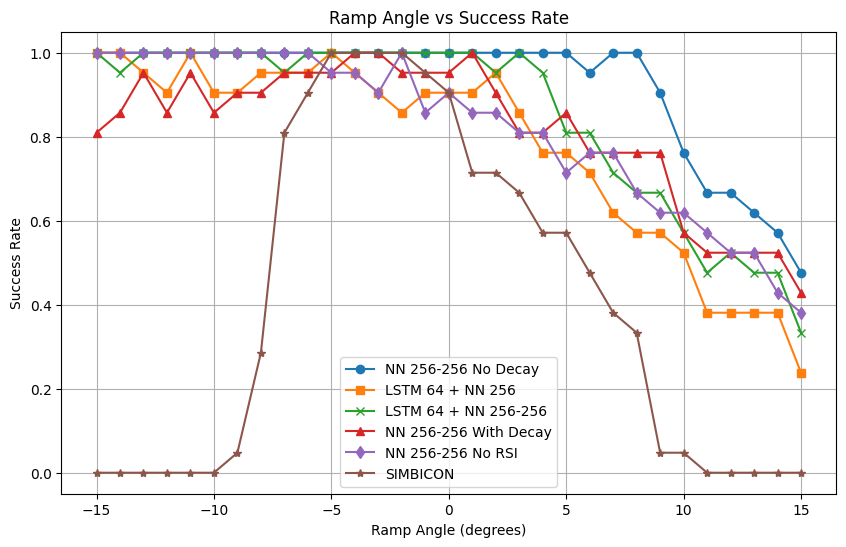

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(ramp_angles, nn_256_256_nodecay_angle_success_rate, label='NN 256-256 No Decay', marker='o')
plt.plot(ramp_angles, lstm_64_nn_256_angle_success_rate, label='LSTM 64 + NN 256', marker='s')
plt.plot(ramp_angles, lstm64_nn_256_256_angle_success_rate, label='LSTM 64 + NN 256-256', marker='x')
plt.plot(ramp_angles, nn_256_256_decay_angle_success_rate, label='NN 256-256 With Decay', marker='^')
plt.plot(ramp_angles, nn_256_256_norsi_angle_success_rate, label='NN 256-256 No RSI', marker='d')
plt.plot(ramp_angles, simbicon_rotation_success_rate, label='SIMBICON', marker='*')
plt.title('Ramp Angle vs Success Rate')
plt.xlabel('Ramp Angle (degrees)')
plt.ylabel('Success Rate')
plt.legend()
plt.grid()
plt.show()

**Noisy Plane Success Analysis**

In [10]:
nn_256_256_nodecay_noisy0_csv = pd.read_csv(os.path.join(nn_256_256_nodecay_path, "demo_data_noisy_mlp_0.csv"))
lstm_64_nn_256_noisy0_csv = pd.read_csv(os.path.join(lstm_64_nn_256_path, "demo_data_noisy_lstm_0.csv"))
lstm64_nn_256_256_noisy0_csv = pd.read_csv(os.path.join(lstm64_nn_256_256_path, "demo_data_noisy_lstm_0.csv"))
nn_256_256_decay_noisy0_csv = pd.read_csv(os.path.join(nn_256_256_decay_path, "demo_data_noisy_mlp_0.csv"))
nn_256_256_norsi_noisy0_csv = pd.read_csv(os.path.join(nn_256_256_norside_path, "demo_data_noisy_mlp_0.csv"))
simbicon_noisy0_csv = pd.read_csv("/home/baran/Bipedal-imitation-rl/locomotion-master(1)/locomotion-master/simbicon_noisyplane_0.csv")

nn_256_256_nodecay_noisy1_csv = pd.read_csv(os.path.join(nn_256_256_nodecay_path, "demo_data_noisy_mlp_1.csv"))
lstm_64_nn_256_noisy1_csv = pd.read_csv(os.path.join(lstm_64_nn_256_path, "demo_data_noisy_lstm_1.csv"))
lstm64_nn_256_256_noisy1_csv = pd.read_csv(os.path.join(lstm64_nn_256_256_path, "demo_data_noisy_lstm_1.csv"))
nn_256_256_decay_noisy1_csv = pd.read_csv(os.path.join(nn_256_256_decay_path, "demo_data_noisy_mlp_1.csv"))
nn_256_256_norsi_noisy1_csv = pd.read_csv(os.path.join(nn_256_256_norside_path, "demo_data_noisy_mlp_1.csv"))

In [11]:
noise_levels = nn_256_256_nodecay_noisy0_csv["noise level"].unique()
nn_256_256_nodecay_noisy0_success_rate = np.zeros(len(noise_levels))
lstm_64_nn_256_noisy0_success_rate = np.zeros(len(noise_levels))
lstm64_nn_256_256_noisy0_success_rate = np.zeros(len(noise_levels))
nn_256_256_decay_noisy0_success_rate = np.zeros(len(noise_levels))
nn_256_256_norsi_noisy0_success_rate = np.zeros(len(noise_levels))
simbicon_noisy0_success_rate = np.zeros(len(noise_levels))

for i, noise in enumerate(noise_levels):
    total_trials = len(nn_256_256_nodecay_noisy0_csv[nn_256_256_nodecay_noisy0_csv["noise level"] == noise])
    nn_256_256_nodecay_noisy0_success_rate[i] = len(nn_256_256_nodecay_noisy0_csv[(nn_256_256_nodecay_noisy0_csv["noise level"] == noise) & (nn_256_256_nodecay_noisy0_csv["success"] == 1)]) / total_trials
    lstm_64_nn_256_noisy0_success_rate[i] = len(lstm_64_nn_256_noisy0_csv[(lstm_64_nn_256_noisy0_csv["noise level"] == noise) & (lstm_64_nn_256_noisy0_csv["success"] == 1)]) / total_trials
    lstm64_nn_256_256_noisy0_success_rate[i] = len(lstm64_nn_256_256_noisy0_csv[(lstm64_nn_256_256_noisy0_csv["noise level"] == noise) & (lstm64_nn_256_256_noisy0_csv["success"] == 1)]) / total_trials
    nn_256_256_decay_noisy0_success_rate[i] = len(nn_256_256_decay_noisy0_csv[(nn_256_256_decay_noisy0_csv["noise level"] == noise) & (nn_256_256_decay_noisy0_csv["success"] == 1)]) / total_trials
    nn_256_256_norsi_noisy0_success_rate[i] = len(nn_256_256_norsi_noisy0_csv[(nn_256_256_norsi_noisy0_csv["noise level"] == noise) & (nn_256_256_norsi_noisy0_csv["success"] == 1)]) / total_trials
    simbicon_noisy0_success_rate[i] = len(simbicon_noisy0_csv[(simbicon_noisy0_csv["noise level"] == noise) & (simbicon_noisy0_csv["success"] == 1)]) / total_trials

nn_256_256_nodecay_noisy1_success_rate = np.zeros(len(noise_levels))
lstm_64_nn_256_noisy1_success_rate = np.zeros(len(noise_levels))
lstm64_nn_256_256_noisy1_success_rate = np.zeros(len(noise_levels))
nn_256_256_decay_noisy1_success_rate = np.zeros(len(noise_levels))
nn_256_256_norsi_noisy1_success_rate = np.zeros(len(noise_levels))

for i, noise in enumerate(noise_levels):
    total_trials = len(nn_256_256_nodecay_noisy1_csv[nn_256_256_nodecay_noisy1_csv["noise level"] == noise])
    nn_256_256_nodecay_noisy1_success_rate[i] = len(nn_256_256_nodecay_noisy1_csv[(nn_256_256_nodecay_noisy1_csv["noise level"] == noise) & (nn_256_256_nodecay_noisy1_csv["success"] == 1)]) / total_trials
    lstm_64_nn_256_noisy1_success_rate[i] = len(lstm_64_nn_256_noisy1_csv[(lstm_64_nn_256_noisy1_csv["noise level"] == noise) & (lstm_64_nn_256_noisy1_csv["success"] == 1)]) / total_trials
    lstm64_nn_256_256_noisy1_success_rate[i] = len(lstm64_nn_256_256_noisy1_csv[(lstm64_nn_256_256_noisy1_csv["noise level"] == noise) & (lstm64_nn_256_256_noisy1_csv["success"] == 1)]) / total_trials
    nn_256_256_decay_noisy1_success_rate[i] = len(nn_256_256_decay_noisy1_csv[(nn_256_256_decay_noisy1_csv["noise level"] == noise) & (nn_256_256_decay_noisy1_csv["success"] == 1)]) / total_trials
    nn_256_256_norsi_noisy1_success_rate[i] = len(nn_256_256_norsi_noisy1_csv[(nn_256_256_norsi_noisy1_csv["noise level"] == noise) & (nn_256_256_norsi_noisy1_csv["success"] == 1)]) / total_trials

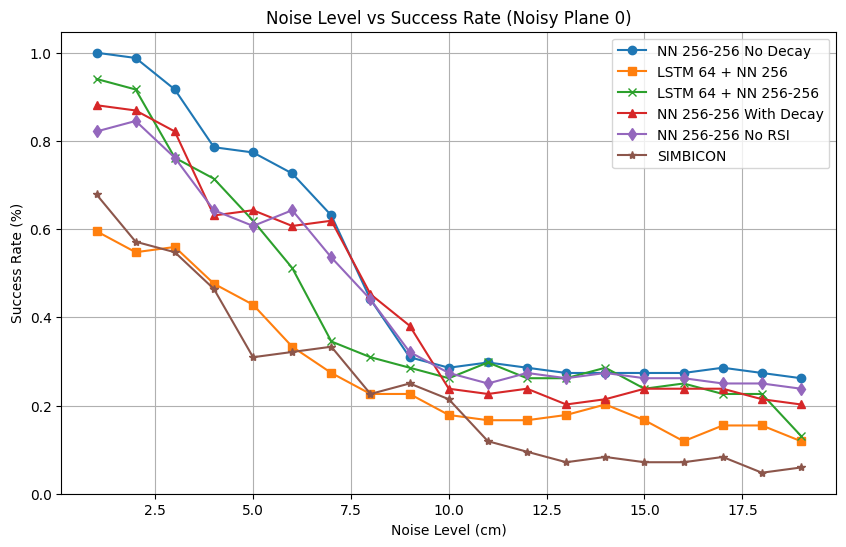

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, nn_256_256_nodecay_noisy0_success_rate, label='NN 256-256 No Decay', marker='o')
plt.plot(noise_levels, lstm_64_nn_256_noisy0_success_rate, label='LSTM 64 + NN 256', marker='s')
plt.plot(noise_levels, lstm64_nn_256_256_noisy0_success_rate, label='LSTM 64 + NN 256-256', marker='x')
plt.plot(noise_levels, nn_256_256_decay_noisy0_success_rate, label='NN 256-256 With Decay', marker='^')
plt.plot(noise_levels, nn_256_256_norsi_noisy0_success_rate, label='NN 256-256 No RSI', marker='d')
plt.plot(noise_levels, simbicon_noisy0_success_rate, label='SIMBICON', marker='*')
plt.title('Noise Level vs Success Rate (Noisy Plane 0)')
plt.xlabel('Noise Level (cm)')
plt.ylabel('Success Rate (%)')
plt.legend()
plt.grid()
plt.show()


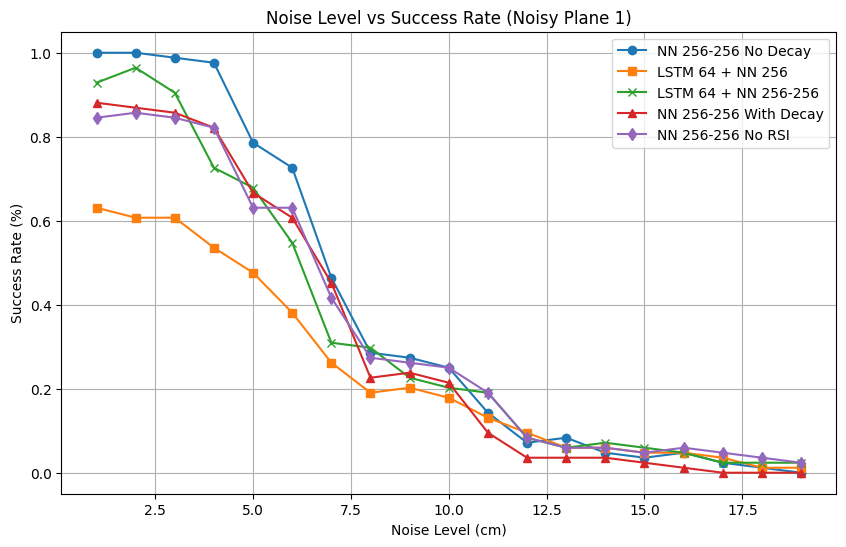

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, nn_256_256_nodecay_noisy1_success_rate, label='NN 256-256 No Decay', marker='o')
plt.plot(noise_levels, lstm_64_nn_256_noisy1_success_rate, label='LSTM 64 + NN 256', marker='s')
plt.plot(noise_levels, lstm64_nn_256_256_noisy1_success_rate, label='LSTM 64 + NN 256-256', marker='x')
plt.plot(noise_levels, nn_256_256_decay_noisy1_success_rate, label='NN 256-256 With Decay', marker='^')
plt.plot(noise_levels, nn_256_256_norsi_noisy1_success_rate, label='NN 256-256 No RSI', marker='d')
plt.title('Noise Level vs Success Rate (Noisy Plane 1)')
plt.xlabel('Noise Level (cm)')
plt.ylabel('Success Rate (%)')
plt.legend()
plt.grid()
plt.show()
